In [1]:
import pandas as pd
import numpy as np
import datashader as ds
from scipy.spatial import Delaunay
import datashader.utils as du, datashader.transfer_functions as tf

import plotly
import plotly.graph_objects as go

In [2]:
def triangulate(vertices, x="x", y="y"):
    """
    Generate a triangular mesh for the given x,y,z vertices, using Delaunay triangulation.
    For large n, typically results in about double the number of triangles as vertices.
    """
    triang = Delaunay(vertices[[x,y]].values)
    print('Given', len(vertices), "vertices, created", len(triang.simplices), 'triangles.')
    return pd.DataFrame(triang.simplices, columns=['v0', 'v1', 'v2'])

In [3]:
df = pd.read_csv('extra_features.csv')

In [4]:
df.head()

,Unnamed: 0,field_1,X,Y,green_cove,green_co_1,green_co_2,green_co_3,landuse_majority,elevation_mean,elevation_range,elevation_majority,slope_mean,orientation_mean
0,0,0,3.655359e+06,2.070910e+06,5297,726516,137.156126,141.0,312.0,199.254802,59.430008,190.740005,20.960422,224.190428
1,1,1,3.655450e+06,2.070801e+06,5945,849799,142.943482,147.0,311.0,199.392714,62.229996,194.850006,22.828920,145.431366
2,2,2,3.655459e+06,2.070900e+06,3737,511437,136.857640,139.0,312.0,221.252228,52.389999,221.179993,20.978525,245.407737
3,3,3,3.655456e+06,2.069699e+06,6501,922808,141.948623,144.0,311.0,409.811718,63.619995,387.880005,23.704270,198.288128
4,4,4,3.655464e+06,2.069798e+06,8129,1162246,142.975274,146.0,311.0,384.606403,53.549988,376.790009,21.304633,77.051443


In [5]:
tris = triangulate(df, x='X', y='Y')

Given 10213 vertices, created 20407 triangles.


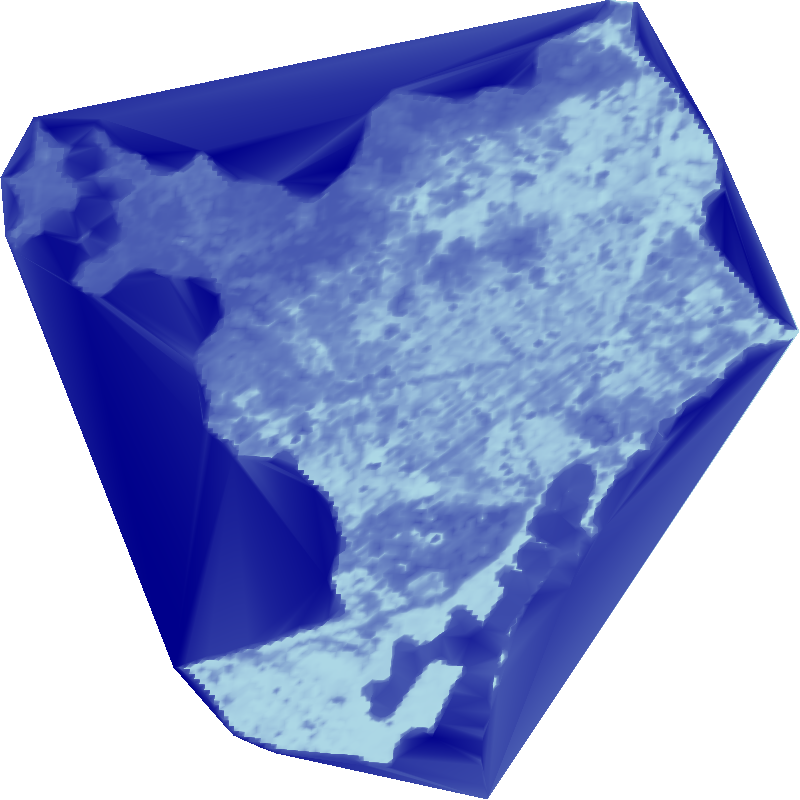

In [6]:
cvs = ds.Canvas(plot_height=800,plot_width=800)
tf.shade(cvs.trimesh(df[['X', 'Y', 'green_co_1']], tris))

In [7]:
# Read data from a csv
z_data = df.pivot_table(values='elevation_mean', columns='X', index='Y')

In [8]:
z_data = z_data.where(z_data.notnull(), 0)

In [10]:
import seaborn as sns
sns.set()
sns.heatmap(z_data.values)

MemoryError: Unable to allocate array with shape (104325796, 2) and data type float64

In [ ]:
fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()